In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

import itertools

sns.set_style("darkgrid")

def flatten(t):
    return [item for sublist in t for item in sublist]

pd.set_option('max_columns', None)

In [25]:
results_complete = pd.read_csv('./results_summary.csv', delimiter=';')
results_complete = results_complete[results_complete['i_net_nas'] == True]
results_complete_columns = list(results_complete.columns)

results_summary = pd.read_csv('./results_summary.csv', delimiter=';')
results_summary = results_summary[results_summary['i_net_nas'] == True]
results_summary_columns = list(results_summary.columns)

results_summary.head(100)

,function_family_maximum_depth,function_family_beta,function_family_decision_sparsity,function_family_fully_grown,function_family_dt_type,function_family_basic_function_representation_length,function_family_function_representation_length,data_number_of_variables,data_num_classes,data_categorical_indices,data_dt_type_train,data_maximum_depth_train,data_decision_sparsity_train,data_function_generation_type,data_objective,data_x_max,data_x_min,data_x_distrib,data_lambda_dataset_size,data_noise_injected_level,data_noise_injected_type,lambda_net_epochs_lambda,lambda_net_early_stopping_lambda,lambda_net_early_stopping_min_delta_lambda,lambda_net_batch_lambda,lambda_net_dropout_lambda,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,lambda_net_loss_lambda,lambda_net_number_of_lambda_weights,lambda_net_number_initializations_lambda,lambda_net_number_of_trained_lambda_nets,i_net_dense_layers,i_net_convolution_layers,i_net_lstm_layers,i_net_dropout,i_net_optimizer,i_net_learning_rate,i_net_loss,i_net_metrics,i_net_epochs,i_net_early_stopping,i_net_batch_size,i_net_interpretation_dataset_size,i_net_test_size,i_net_function_representation_type,i_net_normalize_lambda_nets,i_net_optimize_decision_function,i_net_function_value_loss,i_net_soft_labels,i_net_data_reshape_version,i_net_nas,i_net_nas_type,i_net_nas_trials,evaluation_random_evaluation_dataset_size,evaluation_per_network_optimization_dataset_size,evaluation_sklearn_dt_benchmark,evaluation_sdt_benchmark,evaluation_different_eval_data,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_lambda_dataset_size,evaluation_eval_data_description_eval_data_noise_injected_level,evaluation_eval_data_description_eval_data_noise_injected_type,evaluation_eval_data_description_eval_data_number_of_trained_lambda_nets,evaluation_eval_data_description_eval_data_interpretation_dataset_size,computation_load_model,computation_n_jobs,computation_use_gpu,computation_gpu_numbers,computation_RANDOM_SEED,train_dt_scores_soft_binary_crossentropy,train_dt_scores_soft_binary_crossentropy_median,train_dt_scores_soft_binary_crossentropy_data_random,train_dt_scores_soft_binary_crossentropy_data_random_median,train_dt_scores_binary_crossentropy,train_dt_scores_binary_crossentropy_median,train_dt_scores_binary_crossentropy_data_random,train_dt_scores_binary_crossentropy_data_random_median,train_dt_scores_accuracy,train_dt_scores_accuracy_median,train_dt_scores_accuracy_data_random,train_dt_scores_accuracy_data_random_median,train_dt_scores_f1_score,train_dt_scores_f1_score_median,train_dt_scores_f1_score_data_random,train_dt_scores_f1_score_data_random_median,train_dt_scores_runtime,train_dt_scores_runtime_median,train_inet_scores_soft_binary_crossentropy,train_inet_scores_soft_binary_crossentropy_median,train_inet_scores_binary_crossentropy,train_inet_scores_binary_crossentropy_median,train_inet_scores_accuracy,train_inet_scores_accuracy_median,train_inet_scores_f1_score,train_inet_scores_f1_score_median,train_inet_scores_runtime,train_inet_scores_runtime_median,valid_dt_scores_soft_binary_crossentropy,valid_dt_scores_soft_binary_crossentropy_median,valid_dt_scores_soft_binary_crossentropy_data_random,valid_dt_scores_soft_binary_crossentropy_data_random_median,valid_dt_scores_binary_crossentropy,valid_dt_scores_binary_crossentropy_median,valid_dt_scores_binary_crossentropy_data_random,valid_dt_scores_binary_crossentropy_data_random_median,valid_dt_scores_accuracy,valid_dt_scores_accuracy_median,valid_dt_scores_accuracy_data_random,valid_dt_scores_accuracy_data_random_median,valid_dt_scores_f1_score,valid_dt_scores_f1_score_median,valid_dt_scores_f1_score_data_random,valid_dt_scores_f1_score_data_random_median,valid_dt_scores_runtime,valid_dt_scores_runtime_median,valid_inet_scores_soft_binary_crossentropy,valid_inet_scores_soft_binary_crossentropy_median,valid_inet_scores_binary_crossentropy,valid_inet_scores_binary_crossentropy_median,valid_inet

In [3]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'data_categorical_indices',
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'i_net_data_reshape_version',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [4]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_inet_scores' for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])

    
print(results_summary_inet.shape)
results_summary_inet

(10, 123)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
9,vanilla1_inet_scores,5,1,vanilla,None,10,0.0,[],[128],adam,[2048],[0],binary_crossentropy,10000,3,None,make_classification,0,0.605177,0.606741,0.543416,0.548938,0.712224,0.7304,0.568364,0.683682,0.001666,0.001666,0.608952,0.616190,0.552218,0.572235,0.709960,0.7008,0.542590,0.653424,0.001238,0.001238,0.661558,0.681917,0.642252,0.680558,0.608672,0.5868,0.571578,0.617096,0.002505,0.002505,0.897780,1.806622,0.385997,0.556996,0.774751,0.704227,0.743316,0.374302,0.544715,0.308116,0.665616,0.664575,0

In [5]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores' for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled

(10, 123)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
9,vanilla1_dt_scores,5,1,vanilla,None,10,0.0,[],[128],adam,[2048],[0],binary_crossentropy,10000,3,None,make_classification,0,0.428309,0.430602,0.251268,0.233944,0.947912,0.9480,0.938596,0.950639,0.035297,0.034611,0.426958,0.426086,0.231554,0.225975,0.950904,0.9504,0.940081,0.951162,0.033779,0.034142,0.509882,0.515251,0.429698,0.438429,0.817904,0.8096,0.775668,0.786498,0.034343,0.033809,0.545946,5.356995,0.843697,0.821529,0.005430,0.786528,11.847299,0.480447,0.502674,0.005747,0.736102,8.738723,0.

In [6]:
columns_dt_distilled_random_data = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'runtime' not in column:
            if 'data_random' in column:
                columns_dt_distilled_random_data.append(column)
        else: 
            columns_dt_distilled_random_data.append(column)
results_summary_dt_distilled_random_data = results_summary[flatten([colmuns_identifier, columns_dt_distilled_random_data])]

columns_dt_distilled_random_data_rename = []
for column in columns_dt_distilled_random_data:
    column = column.replace('dt_scores_','')
    column = column.replace('_data_random','')
    columns_dt_distilled_random_data_rename.append(column)

results_summary_dt_distilled_random_data.columns = flatten([colmuns_identifier, columns_dt_distilled_random_data_rename])

#results_summary_dt_distilled_random_data.insert(0, 'scores_type', 'dt_scores_data_random')
results_summary_dt_distilled_random_data.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores_data_random' for dt_type, decision_sparsity in zip(results_summary_dt_distilled_random_data['function_family_dt_type'].values, results_summary_dt_distilled_random_data['function_family_decision_sparsity'].values)])


print(results_summary_dt_distilled_random_data.shape)
results_summary_dt_distilled_random_data

(10, 123)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
9,vanilla1_dt_scores_data_random,5,1,vanilla,None,10,0.0,[],[128],adam,[2048],[0],binary_crossentropy,10000,3,None,make_classification,0,0.424057,0.423117,0.101336,0.098122,0.963100,0.9655,0.956243,0.965735,0.035297,0.034611,0.423717,0.420154,0.093717,0.089547,0.965712,0.9688,0.958600,0.966366,0.033779,0.034142,0.492914,0.495036,0.336284,0.349998,0.848332,0.8454,0.822018,0.833345,0.034343,0.033809,0.334984,0.007029,0.998,0.998973,0.005430,0.569791,0.285508,0.888,0.888446,0.005747,0.429750,0.0643

In [7]:
results_summary_reduced = pd.concat([
                                     results_summary_inet, 
                                     results_summary_dt_distilled, 
                                     #results_summary_dt_distilled_random_data
                                    ]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced

,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,vanilla1_inet_scores,5,1,vanilla,None,10,0.0,[],[128],adam,[2048],[0],binary_crossentropy,10000,3,None,make_classification,0,0.605177,0.606741,0.543416,0.548938,0.712224,0.7304,0.568364,0.683682,0.001666,0.001666,0.608952,0.616190,0.552218,0.572235,0.709960,0.7008,0.542590,0.653424,0.001238,0.001238,0.661558,0.681917,0.642252,0.680558,0.608672,0.5868,0.571578,0.617096,0.002505,0.002505,0.897780,1.806622,0.385997,0.556996,0.774751,0.704227,0.743316,0.374302,0.544715,0.308116,0.665616,0.664575,0

In [8]:
colmuns_identifier.append('scores_type')
not_considered_random_dataset_sizes = ['1000', '100000', '1000000']

In [9]:
results_summary_reduced_columns

Index(['scores_type', 'function_family_maximum_depth',
       'function_family_decision_sparsity', 'function_family_dt_type',
       'data_dt_type_train', 'data_number_of_variables',
       'data_noise_injected_level', 'data_categorical_indices',
       'lambda_net_lambda_network_layers', 'lambda_net_optimizer_lambda',
       ...
       'soft_binary_crossentropy_titanic_TRAIN_DATA',
       'binary_crossentropy_titanic_TRAIN_DATA', 'accuracy_titanic_TRAIN_DATA',
       'f1_score_titanic_TRAIN_DATA', 'runtime_titanic_TRAIN_DATA',
       'soft_binary_crossentropy_absenteeism_TRAIN_DATA',
       'binary_crossentropy_absenteeism_TRAIN_DATA',
       'accuracy_absenteeism_TRAIN_DATA', 'f1_score_absenteeism_TRAIN_DATA',
       'runtime_absenteeism_TRAIN_DATA'],
      dtype='object', length=123)

In [10]:
results_summary_reduced_selected_columns = []
for column in results_summary_reduced_columns:  
    if 'median' not in column:
        tokens = column.split('_')
        integer = [token for token in tokens if token.isdigit()]
        if len(integer) > 0:
            integer = integer[0]
            if integer not in not_considered_random_dataset_sizes:                    
                results_summary_reduced_selected_columns.append(column)
        else:
            results_summary_reduced_selected_columns.append(column)

#results_summary_reduced_selected_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_selected_columns])
results_summary_reduced_selected_with_identifier = results_summary_reduced[results_summary_reduced_selected_columns]#results_summary_reduced[results_summary_reduced_selected_with_identifier_columns]
results_summary_reduced_selected_with_identifier

,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_binary_crossentropy,train_accuracy,train_f1_score,train_runtime,valid_soft_binary_crossentropy,valid_binary_crossentropy,valid_accuracy,valid_f1_score,valid_runtime,test_soft_binary_crossentropy,test_binary_crossentropy,test_accuracy,test_f1_score,test_runtime,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,vanilla1_inet_scores,5,1,vanilla,None,10,0.0,[],[128],adam,[2048],[0],binary_crossentropy,10000,3,None,make_classification,0,0.605177,0.543416,0.712224,0.568364,0.001666,0.608952,0.552218,0.709960,0.542590,0.001238,0.661558,0.642252,0.608672,0.571578,0.002505,0.897780,1.806622,0.385997,0.556996,0.774751,0.704227,0.743316,0.374302,0.544715,0.308116,0.665616,0.664575,0.668919,0.000000,0.340830,0.897780,1.806622,0.385997,0.556996,0.774751,0.704227,0.743316,0.374302,0.544715,0.308116,0.665616,0.664575,0.668919,0.000000,0.340830
1,vanilla1_inet_scores,5,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,0.590967,0.511108,0.739952,0.642635,0.001209,0.591202,0.510903,0.732280,0.660318,0.001230,0.661911,0.642753,0.614832,0.600775,0.001760,0.877569,1.539249,0.384001,0.554915,0.260102,0.657350,0.605315,0.826816,0.805031,0.222241,0.666386,0.648566,0.668919,0.000000,0.184331,0.877569,1.539249,0.384001,0.554915,0.260102,0.657350,0.605315,0.826816,0.805031,0.222241,0.666386,0.648566,0.668919,0.000000,0.184331
2,vanilla1_inet_scores,3,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,0.608339,0.545444,0.719352,0.595788,0.000834,0.605517,0.541731,0.733736,0.632256,0.000734,0.662136,0.638357,0.624528,0.535337,0.001307,0.820993,1.144113,0.384001,0.554915,0.109351,0.696025,0.714357,0.374302,0.544715,0.118613,0.674026,0.642063,0.668919,0.000000,0.086774,0.820993,1.144113,0.384001,0.554915,0.109351,0.696025,0.714357,0.374302,0.544715,0.118613,0.674026,0.642063,0.668919,0.000000,0.086774
3,vanilla1_inet_scores,4,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,0.608368,0.547640,0.712600,0.639617,0.000723,0.609027,0.549993,0.717952,0.607010,0.000669,0.658033,0.632159,0.635712,0.577533,0.001151,0.811849,1.075356,0.384001,0.554915,0.138473,0.641982,0.564567,0.798883,0.780488,0.161477,0.658779,0.608722,0.668919,0.000000,0.130729,0.811849,1.075356,0.384001,0.554915,0.138473,0.641982,0.564567,0.798883,0.780488,0.161477,0.658779,0.608722,0.668919,0.000000,0.130729

In [11]:
results_summary_reduced_binary_crossentropy_columns = []
for column in results_summary_reduced_columns:  
    if 'binary_crossentropy' in column:
        if 'soft' not in column:           
            if 'median' not in column:
                tokens = column.split('_')
                integer = [token for token in tokens if token.isdigit()]
                if len(integer) > 0:
                    integer = integer[0]
                    if integer not in not_considered_random_dataset_sizes:                    
                        results_summary_reduced_binary_crossentropy_columns.append(column)
                else:
                    if 'TRAIN_DATA' not in column:
                        results_summary_reduced_binary_crossentropy_columns.append(column)
                        
results_summary_reduced_binary_crossentropy_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_binary_crossentropy_columns])
results_summary_reduced_binary_crossentropy_with_identifier = results_summary_reduced[results_summary_reduced_binary_crossentropy_with_identifier_columns]
results_summary_reduced_binary_crossentropy_with_identifier

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,train_binary_crossentropy,valid_binary_crossentropy,test_binary_crossentropy,binary_crossentropy_adult_10000,binary_crossentropy_titanic_10000,binary_crossentropy_absenteeism_10000
0,5,1,vanilla,None,10,0.0,[],[128],adam,[2048],[0],binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,0.543416,0.552218,0.642252,1.806622,0.743316,0.664575
1,5,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,0.511108,0.510903,0.642753,1.539249,0.605315,0.648566
2,3,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,0.545444,0.541731,0.638357,1.144113,0.714357,0.642063
3,4,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,0.547640,0.549993,0.632159,1.075356,0.564567,0.608722
4,3,1,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,SDT1_inet_scores,0.405060,0.410055,0.623159,0.907428,0.525209,0.636826
5,5,1,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,SDT1_inet_scores,0.413377,0.495684,0.652437,0.994820,0.733773,0.660329
6,4,1,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,SDT1_inet_scores,0.406306,0.421501,0.651185,1.232213,0.383825,0.639423
7,4,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_inet_scores,0.363900,0.384350,0.464441,0.909268,0.387516,0.417067
8,3,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_inet_scores,0.291619,0.303755,0.502594,1.097139,0.431003,0.400226
9,5,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_inet_scores,0.374709,0.398977,0.508866,0.537537,0.274225,0.524770


In [12]:
results_summary_reduced_accuracy_columns = []
for column in results_summary_reduced_columns:  
    if 'accuracy' in column:
        if 'soft' not in column:           
            if 'median' not in column:
                tokens = column.split('_')
                integer = [token for token in tokens if token.isdigit()]
                if len(integer) > 0:
                    integer = integer[0]
                    if integer not in not_considered_random_dataset_sizes:                    
                        results_summary_reduced_accuracy_columns.append(column)
                else:
                    if 'TRAIN_DATA' not in column:
                        results_summary_reduced_accuracy_columns.append(column)

results_summary_reduced_accuracy_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_accuracy_columns])
results_summary_reduced_accuracy_with_identifier = results_summary_reduced[results_summary_reduced_accuracy_with_identifier_columns]
results_summary_reduced_accuracy_with_identifier


,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,train_accuracy,valid_accuracy,test_accuracy,accuracy_adult_10000,accuracy_titanic_10000,accuracy_absenteeism_10000
0,5,1,vanilla,None,10,0.0,[],[128],adam,[2048],[0],binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,0.712224,0.709960,0.608672,0.385997,0.374302,0.668919
1,5,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,0.739952,0.732280,0.614832,0.384001,0.826816,0.668919
2,3,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,0.719352,0.733736,0.624528,0.384001,0.374302,0.668919
3,4,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,0.712600,0.717952,0.635712,0.384001,0.798883,0.668919
4,3,1,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,SDT1_inet_scores,0.808512,0.803512,0.642992,0.384001,0.770950,0.668919
5,5,1,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,SDT1_inet_scores,0.806928,0.744608,0.624816,0.385997,0.374302,0.668919
6,4,1,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,SDT1_inet_scores,0.807256,0.814864,0.626800,0.621987,0.932961,0.668919
7,4,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_inet_scores,0.838424,0.832096,0.775504,0.623369,0.932961,0.824324
8,3,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_inet_scores,0.874408,0.873912,0.744192,0.623676,0.854749,0.837838
9,5,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_inet_scores,0.822424,0.813472,0.745424,0.621833,0.916201,0.756757


In [13]:
figsize = (20, 10)
font_scale = 2.5

legend_fontsize = 25
legend_loc = 2

color_1 = '#84b7e9'#'#c0d6ff'
color_2 = '#0a6fd3'#'#96bcff'
color_3 = '#06427e'#'#6ca1ff'

In [14]:
inet_structure = '[2048, 1024, 512, 256]'
noise_injected_level = 0
categorical_indices = '[]'
data_reshape_version = None

number_of_variables = 10
#maximum_depth = 3

results_summary_reduced_plot = results_summary_reduced_selected_with_identifier
results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['i_net_dense_layers'] == inet_structure]
results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['data_noise_injected_level'] == noise_injected_level]
results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['data_categorical_indices'] == categorical_indices]
results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['i_net_data_reshape_version'] == data_reshape_version]

results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['data_number_of_variables'] == number_of_variables]
#results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['function_family_maximum_depth'] == maximum_depth]

results_summary_reduced_plot = results_summary_reduced_plot.sort_values(by=['function_family_dt_type', 'function_family_decision_sparsity'], ascending=(False, True))
results_summary_reduced_plot

,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_binary_crossentropy,train_accuracy,train_f1_score,train_runtime,valid_soft_binary_crossentropy,valid_binary_crossentropy,valid_accuracy,valid_f1_score,valid_runtime,test_soft_binary_crossentropy,test_binary_crossentropy,test_accuracy,test_f1_score,test_runtime,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA


In [15]:
results_summary_reduced_accuracy_plot_single_column = pd.concat([results_summary_reduced_accuracy_plot[identifier_columns] for _ in range(len(result_columns))],axis=0)
#results_summary_reduced_accuracy_plot_single_column['result_identifier'] = flatten([[result_column]*number_of_results for result_column in result_columns])
results_summary_reduced_accuracy_plot_single_column

In [21]:
inet_structure = '[2048, 1024, 512, 256]'
noise_injected_level = 0
categorical_indices = '[]'
data_reshape_version = 'None'

number_of_variables = 10
#maximum_depth = 3

results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_with_identifier
results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['i_net_dense_layers'] == inet_structure]
results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['data_noise_injected_level'] == noise_injected_level]
results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['data_categorical_indices'] == categorical_indices]
results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['i_net_data_reshape_version'] == data_reshape_version]

results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['data_number_of_variables'] == number_of_variables]
#results_summary_reduced_accuracy_plot = results_summary_reduced_plot[results_summary_reduced_plot['function_family_maximum_depth'] == maximum_depth]


results_summary_reduced_accuracy_plot_columns = list(results_summary_reduced_accuracy_plot.columns)
result_columns = []
identifier_columns = []
for column in results_summary_reduced_accuracy_plot_columns:
    if 'accuracy' in column:
        result_columns.append(column)
    else:
        identifier_columns.append(column)
number_of_results = results_summary_reduced_accuracy_plot.shape[0]
       
results_summary_reduced_accuracy_plot_single_column_identifier = pd.concat([results_summary_reduced_accuracy_plot[identifier_columns] for _ in range(len(result_columns))], axis=0)
results_summary_reduced_accuracy_plot_single_column_identifier['result_identifier'] = flatten([[result_column]*number_of_results for result_column in result_columns])
#results_summary_reduced_accuracy_plot_single_column_identifier['result_identifier'] = flatten([[i]*number_of_results for i in range(len(result_columns))])

results_summary_reduced_accuracy_plot_single_column_results = pd.concat([results_summary_reduced_accuracy_plot[result_column] for result_column in result_columns], axis=0)
results_summary_reduced_accuracy_plot_single_column_results.name = 'score'
    
results_summary_reduced_accuracy_plot = pd.concat([results_summary_reduced_accuracy_plot_single_column_identifier, results_summary_reduced_accuracy_plot_single_column_results], axis=1)

results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot.sort_values(by=['function_family_dt_type', 'function_family_decision_sparsity'], ascending=(False, True))
results_summary_reduced_accuracy_plot

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score
1,5,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,train_accuracy,0.739952
2,3,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,train_accuracy,0.719352
3,4,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_inet_scores,train_accuracy,0.712600
11,5,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_dt_scores,train_accuracy,0.947912
12,3,1,vanilla,None,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,3,None,make_classification,0,vanilla1_dt_scores,train_accuracy,0.970216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,3,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_inet_scores,accuracy_absenteeism_10000,0.837838
9,5,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_inet_scores,accuracy_absenteeism_10000,0.756757
17,4,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_dt_scores,accuracy_absenteeism_10000,0.844595
18,3,10,SDT,vanilla,10,0.0,[],[128],adam,"[2048, 1024, 512, 256]","[0.2, 0.2, 0.2, 0]",binary_crossentropy,10000,1,None,make_classification,0,SDT10_dt_scores,accuracy_absenteeism_10000,0.844595


/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


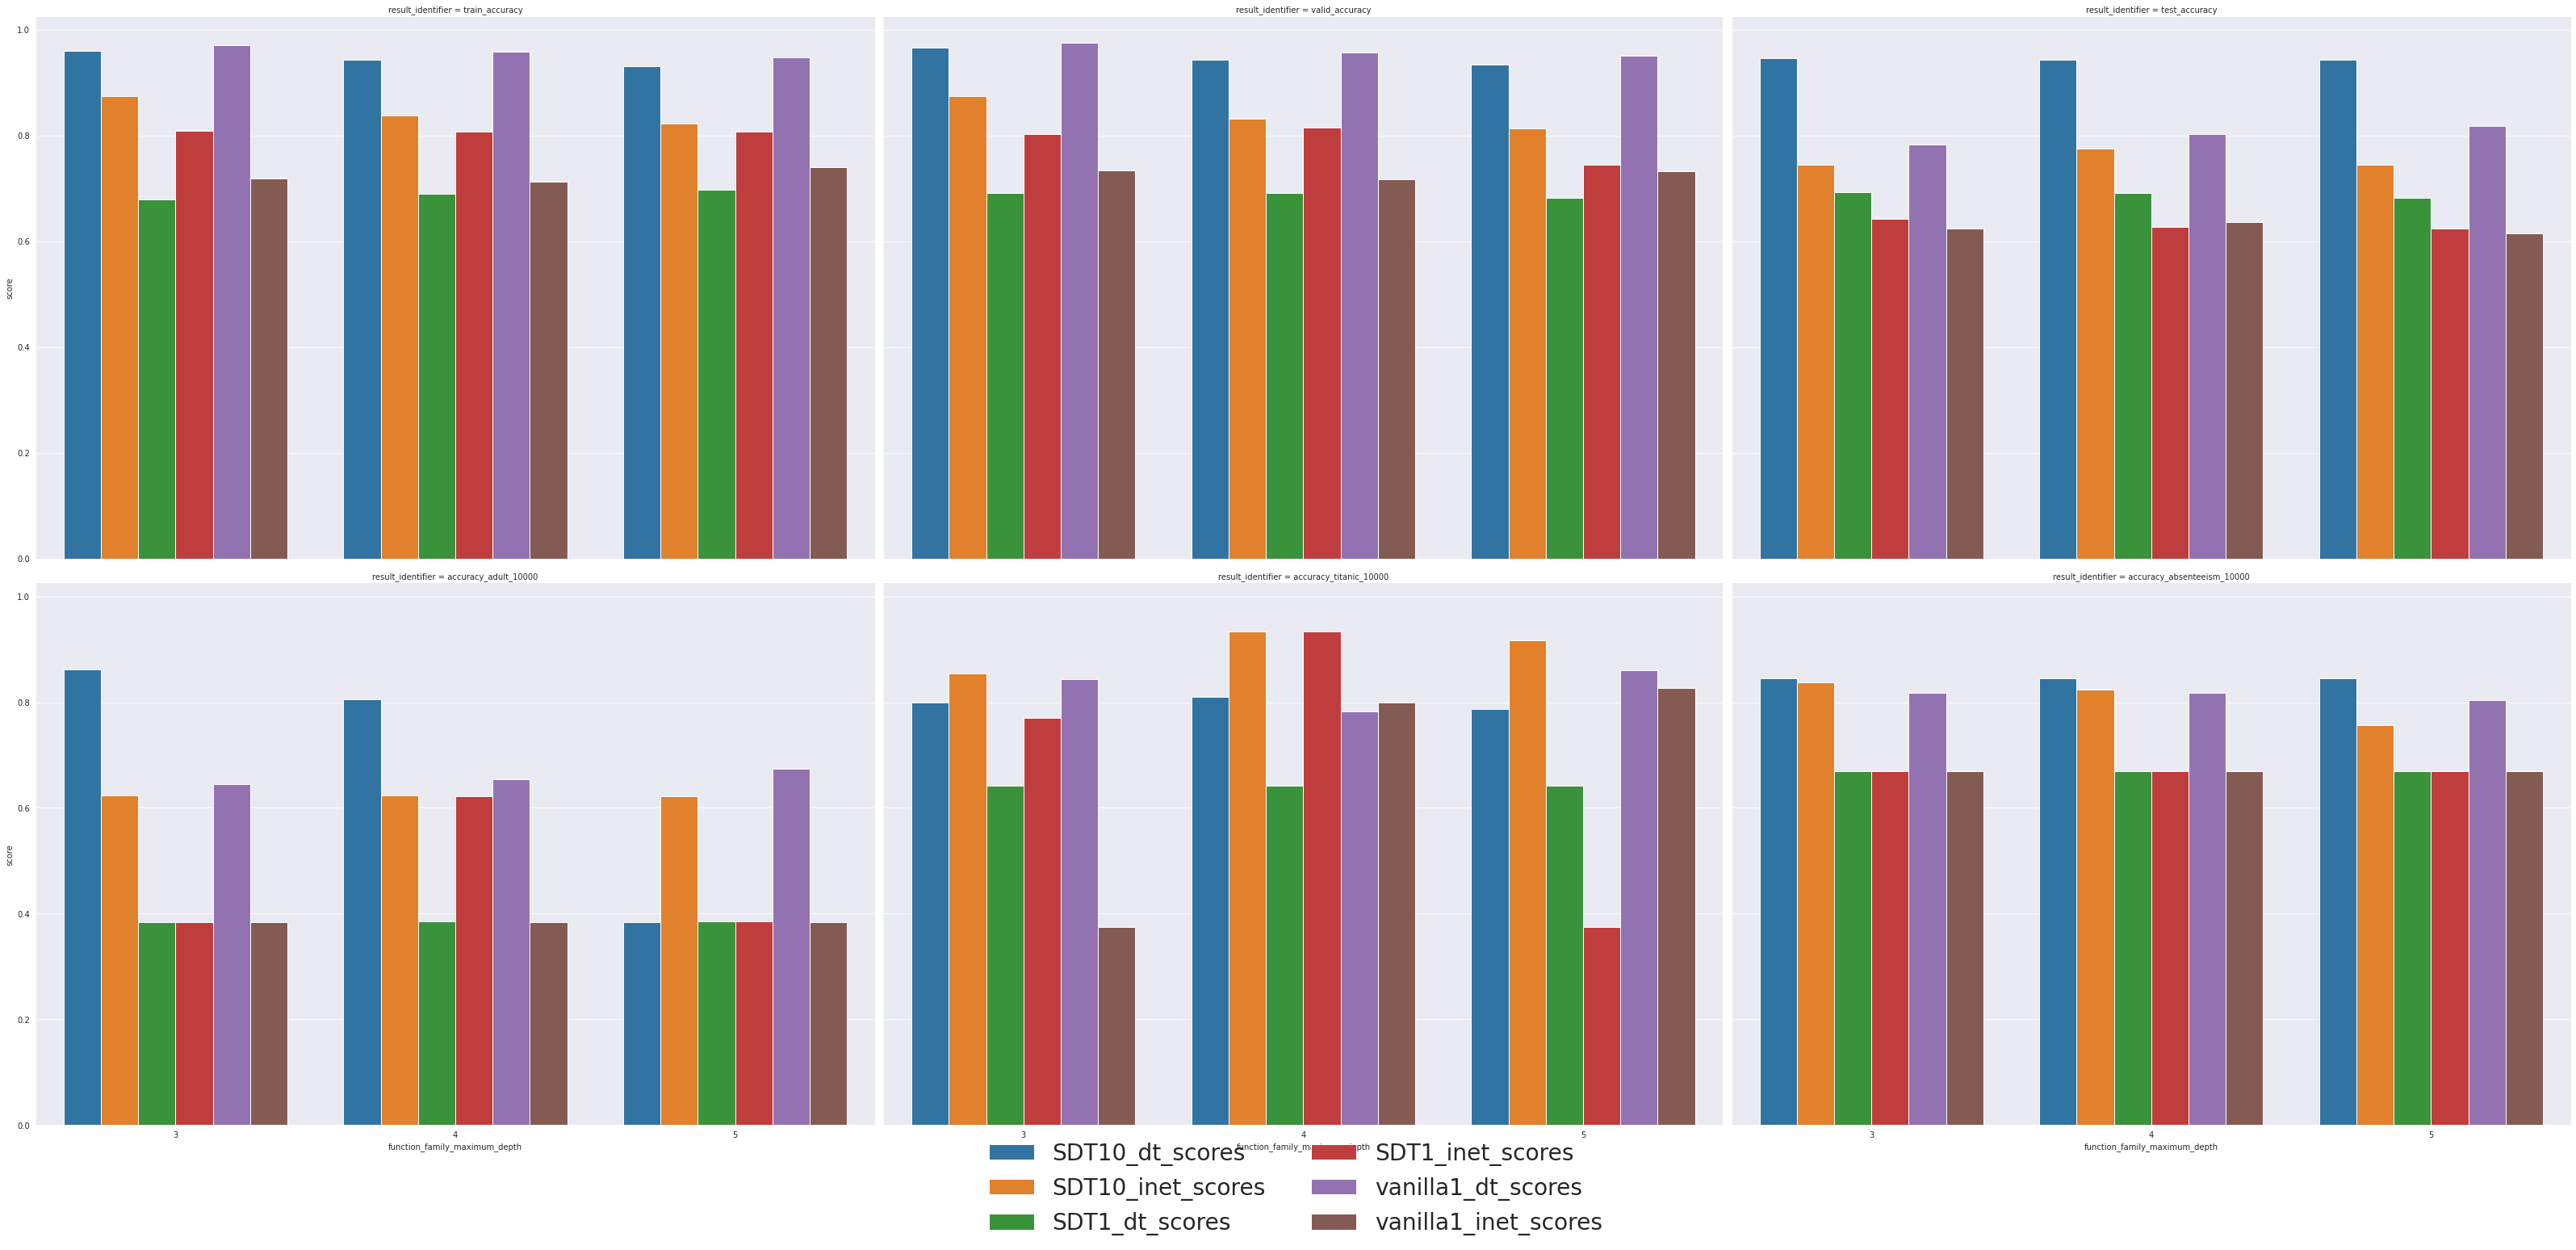

In [22]:


g = sns.FacetGrid(results_summary_reduced_accuracy_plot, 
                  col='result_identifier',
                  #hue='scores_type', 
                  height=10, 
                  col_wrap=3,
                  aspect=1.5,
                  #legend_out=False,
                 )
g.map(sns.barplot, 
      'function_family_maximum_depth', 
      'score', 
      'scores_type',
      hue_order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
      palette=sns.color_palette()#'colorblind'
      #order='ascending'
     )
g.add_legend(fontsize=legend_fontsize*1.125,
           ncol=2,
           bbox_to_anchor=(0.5, -0.025),
           borderaxespad=0)


In [24]:
inet_structure = '[2048, 1024, 512, 256]'
noise_injected_level = 0
categorical_indices = '[]'
data_reshape_version = 3

number_of_variables = 10
#maximum_depth = 3

results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_with_identifier
results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['i_net_dense_layers'] == inet_structure]
results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['data_noise_injected_level'] == noise_injected_level]
results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['data_categorical_indices'] == categorical_indices]
results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['i_net_data_reshape_version'] == data_reshape_version]

results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['data_number_of_variables'] == number_of_variables]
#results_summary_reduced_accuracy_plot = results_summary_reduced_plot[results_summary_reduced_plot['function_family_maximum_depth'] == maximum_depth]


results_summary_reduced_accuracy_plot_columns = list(results_summary_reduced_accuracy_plot.columns)
result_columns = []
identifier_columns = []
for column in results_summary_reduced_accuracy_plot_columns:
    if 'accuracy' in column:
        result_columns.append(column)
    else:
        identifier_columns.append(column)
number_of_results = results_summary_reduced_accuracy_plot.shape[0]
       
results_summary_reduced_accuracy_plot_single_column_identifier = pd.concat([results_summary_reduced_accuracy_plot[identifier_columns] for _ in range(len(result_columns))], axis=0)
results_summary_reduced_accuracy_plot_single_column_identifier['result_identifier'] = flatten([[result_column]*number_of_results for result_column in result_columns])
#results_summary_reduced_accuracy_plot_single_column_identifier['result_identifier'] = flatten([[i]*number_of_results for i in range(len(result_columns))])

results_summary_reduced_accuracy_plot_single_column_results = pd.concat([results_summary_reduced_accuracy_plot[result_column] for result_column in result_columns], axis=0)
results_summary_reduced_accuracy_plot_single_column_results.name = 'score'
    
results_summary_reduced_accuracy_plot = pd.concat([results_summary_reduced_accuracy_plot_single_column_identifier, results_summary_reduced_accuracy_plot_single_column_results], axis=1)

results_summary_reduced_accuracy_plot = results_summary_reduced_accuracy_plot.sort_values(by=['function_family_dt_type', 'function_family_decision_sparsity'], ascending=(False, True))
results_summary_reduced_accuracy_plot

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score


In [ ]:
g = sns.FacetGrid(results_summary_reduced_accuracy_plot, 
                  col='result_identifier',
                  #hue='scores_type', 
                  height=10, 
                  col_wrap=3,
                  aspect=1.5,
                  #legend_out=False,
                 )
g.map(sns.barplot, 
      'function_family_maximum_depth', 
      'score', 
      'scores_type',
      hue_order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
      palette=sns.color_palette()#'colorblind'
      #order='ascending'
     )
g.add_legend(fontsize=legend_fontsize*1.125,
           ncol=2,
           bbox_to_anchor=(0.5, -0.025),
           borderaxespad=0)


In [ ]:
eval_data_string = 'accuracy_titanic_10000'

sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.barplot(x='function_family_maximum_depth', #'data_number_of_variables', 'function_family_maximum_depth'
            y=eval_data_string,#'test_accuracy',
            hue='scores_type', 
            #palette=[color_1, color_2, color_3],
            data=results_summary_reduced_plot)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)
plt.legend(fontsize=legend_fontsize,
           ncol=2,
           bbox_to_anchor=(0.75, -0.15),
           borderaxespad=0)
#sns.despine(offset=10, trim=True)
sns_plot.get_figure().savefig('./evaluation_results/accuracy_barplot_complete_grouped' + eval_data_string + '.pdf', bbox_inches = 'tight', pad_inches = 0)